# Workshop: Convolutional Neural Networks (CNN) avec MNIST

## Objectifs du Workshop
- Comprendre les concepts fondamentaux des CNN
- Implémenter un CNN pour la classification d'images
- Utiliser le dataset MNIST (chiffres manuscrits 0-9)
- Visualiser et interpréter les résultats

## Instructions pour les Participants
Ce notebook contient des **TODOs** que vous devez compléter.
- Cherchez les commentaires `# TODO:` dans les cellules de code
- Complétez le code manquant
- Exécutez chaque cellule pour vérifier votre travail
- N'hésitez pas à expérimenter et modifier les paramètres !

## 1. Installation et Importation des Bibliothèques

   
Importez toutes les bibliothèques nécessaires pour ce workshop.

In [1]:
# Importation des bibliothèques de base
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importation des métriques de sklearn
from sklearn.metrics import classification_report, confusion_matrix

# Importation de TensorFlow et Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

# Configuration pour l'affichage
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Vérification
print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")


c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


TensorFlow version: 2.20.0
Keras version: 3.13.0


###   Résultat attendu :
```
TensorFlow version: 2.20.0
Keras version: 3.13.0
```

> **Note** : Les versions peuvent varier selon votre installation. L'important est que le code s'exécute sans erreur.

## 2. Introduction aux CNN

### Qu'est-ce qu'un CNN ?
Les Convolutional Neural Networks (CNN) sont des réseaux de neurones spécialement conçus pour traiter des données structurées en grille, comme les images.

### Composants principaux :
1. **Couches de Convolution** : Détectent des motifs locaux (bords, textures, formes)
2. **Couches de Pooling** : Réduisent la dimensionnalité et la sensibilité aux translations
3. **Couches Fully Connected** : Effectuent la classification finale

### Avantages des CNN :
- Invariance à la translation
- Partage de paramètres (moins de paramètres à entraîner)
- Extraction automatique de caractéristiques

## 3. Chargement du Dataset MNIST

   
Chargez le dataset MNIST et explorez sa structure.

Le dataset MNIST contient 70,000 images de chiffres manuscrits (0-9) en niveaux de gris de 28x28 pixels.

In [2]:
# Chargez le dataset MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Affichez les formes des données
print("Forme des données d'entraînement:")
print(f"Images: {x_train.shape}")
print(f"Labels: {y_train.shape}")
print(f"\nForme des données de test:") 
print(f"Images: {x_test.shape}")
print(f"Labels: {y_test.shape}")

# Affichez les valeurs min/max des pixels
print(f"\nValeurs min/max: {x_train.min()}/{x_train.max()}")


Forme des données d'entraînement:
Images: (60000, 28, 28)
Labels: (60000,)

Forme des données de test:
Images: (10000, 28, 28)
Labels: (10000,)

Valeurs min/max: 0/255


###   Résultat attendu :
```
Forme des données d'entraînement:
Images: (60000, 28, 28)
Labels: (60000,)

Forme des données de test:
Images: (10000, 28, 28)
Labels: (10000,)

Valeurs min/max: 0/255
```

> **Note** : Vous devriez voir 60,000 images d'entraînement et 10,000 images de test, toutes de taille 28x28 pixels.

## 4. Visualisation des Données
Visualisez quelques exemples du dataset pour comprendre les données.

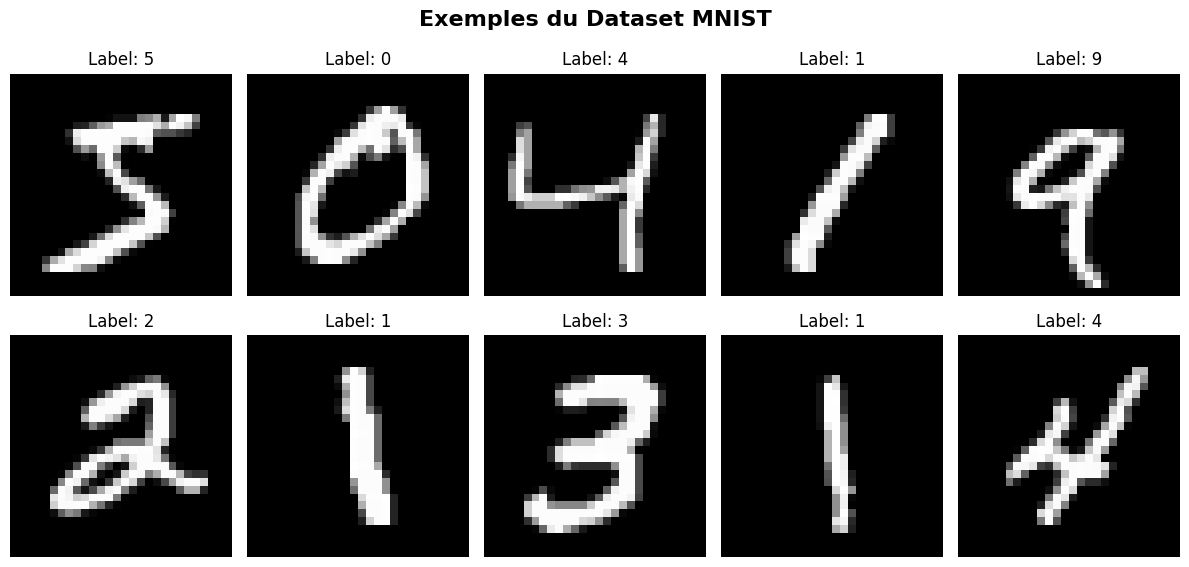

In [3]:
# Créez une figure avec 2 lignes et 5 colonnes
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
fig.suptitle('Exemples du Dataset MNIST', fontsize=16, fontweight='bold')

# Affichez les 10 premières images avec leurs labels
for i in range(10):
    row = i // 5
    col = i % 5
    axes[row, col].imshow(x_train[i], cmap='gray')
    axes[row, col].set_title(f'Label: {y_train[i]}', fontsize=12)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()


###   Résultat attendu :
Vous devriez voir une grille de 10 images (2 lignes × 5 colonnes) affichant les chiffres manuscrits avec leurs labels (0 à 9).

## 5. Préparation des Données

   
Préparez les données pour l'entraînement :
1. Normalisez les pixels (0-255 → 0-1)
2. Ajoutez la dimension du canal pour les CNN
3. Encodez les labels en one-hot

In [4]:
# Normalisez les pixels (divisez par 255.0)
# Astuce: Convertissez d'abord en float32, puis divisez

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print(f"Après normalisation - Min: {x_train.min()}, Max: {x_train.max()}")


Après normalisation - Min: 0.0, Max: 1.0


###   Résultat attendu :
```
Après normalisation - Min: 0.0, Max: 1.0
```

> **Note** : Les valeurs des pixels doivent être entre 0.0 et 1.0 après normalisation.

In [5]:
# Ajoutez la dimension du canal avec np.expand_dims
# Les CNN nécessitent une forme (batch, height, width, channels)
# Utilisez axis=-1 pour ajouter la dimension à la fin
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

print(f"Nouvelle forme d'entraînement: {x_train.shape}")
print(f"Nouvelle forme de test: {x_test.shape}")


Nouvelle forme d'entraînement: (60000, 28, 28, 1)
Nouvelle forme de test: (10000, 28, 28, 1)


###   Résultat attendu :
```
Nouvelle forme d'entraînement: (60000, 28, 28, 1)
Nouvelle forme de test: (10000, 28, 28, 1)
```

> **Note** : La dernière dimension (1) représente le canal (niveaux de gris). Pour les images couleur RGB, ce serait 3.

In [6]:
# Encodez les labels en one-hot avec to_categorical
num_classes = 10
y_train_categorical = to_categorical(y_train, num_classes)
y_test_categorical = to_categorical(y_test, num_classes)

print(f"Forme des labels avant encodage: {y_train.shape}")
print(f"Forme des labels après encodage: {y_train_categorical.shape}")
print(f"\nExemple de label encodé:")
print(f"Label original: {y_train[0]}")
print(f"Label encodé: {y_train_categorical[0]}")


Forme des labels avant encodage: (60000,)
Forme des labels après encodage: (60000, 10)

Exemple de label encodé:
Label original: 5
Label encodé: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


###   Résultat attendu :
```
Forme des labels avant encodage: (60000,)
Forme des labels après encodage: (60000, 10)

Exemple de label encodé:
Label original: 5
Label encodé: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
```

> **Note** : Chaque label est maintenant un vecteur de 10 éléments avec un 1 à la position correspondant au chiffre.

## 6. Architecture du Modèle CNN

   
Construisez un modèle CNN avec l'architecture suivante :
1. **Conv2D**(32 filtres, 3x3) + ReLU + **MaxPooling2D**(2x2)
2. **Conv2D**(64 filtres, 3x3) + ReLU + **MaxPooling2D**(2x2)
3. **Flatten** (aplatir les caractéristiques)
4. **Dense**(128) + ReLU + **Dropout**(0.5)
5. **Dense**(10) + **Softmax** (sortie)

In [7]:
# Créez un modèle Sequential
model = models.Sequential([
    # Première couche de convolution
    # Conv2D avec 32 filtres de taille 3x3, activation='relu', input_shape=(28, 28, 1)
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    
    # Couche de Max Pooling 2x2
    layers.MaxPooling2D((2, 2)),
    
    # Deuxième couche de convolution avec 64 filtres 3x3, activation='relu'
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    # Deuxième couche de Max Pooling 2x2
    layers.MaxPooling2D((2, 2)),
    
    # Aplatissez les caractéristiques
    layers.Flatten(),
    
    # Couche Dense avec 128 neurones et activation='relu'
    layers.Dense(128, activation='relu'),
    
    # Couche Dropout avec taux 0.5
    layers.Dropout(0.5),
    
    # Couche de sortie avec 10 neurones et activation='softmax'
    layers.Dense(10, activation='softmax')
])

# Affichez le résumé du modèle
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

###   Résultat attendu :
Vous devriez voir un résumé du modèle avec environ **1,199,882 paramètres** au total.

Exemple de structure :
```
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 conv1 (Conv2D)              (None, 26, 26, 32)        320       
 pool1 (MaxPooling2D)        (None, 13, 13, 32)        0         
 conv2 (Conv2D)              (None, 11, 11, 64)        18496     
 pool2 (MaxPooling2D)        (None, 5, 5, 64)          0         
 flatten (Flatten)          (None, 1600)              0         
 dense1 (Dense)              (None, 128)               204928    
 dropout (Dropout)           (None, 128)               0         
 output (Dense)              (None, 10)                1290      
=================================================================
Total params: 1,199,882
```

## 7. Compilation du Modèle

   
Compilez le modèle avec :
- **Optimiseur** : Adam
- **Fonction de perte** : categorical_crossentropy
- **Métrique** : accuracy

In [8]:
# Compilez le modèle
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Modèle compilé avec succès!")


Modèle compilé avec succès!


###   Résultat attendu :
```
Modèle compilé avec succès!
```

> **Note** : Si vous voyez ce message, la compilation a réussi. Le modèle est prêt pour l'entraînement.

## 8. Entraînement du Modèle

   
Entraînez le modèle avec :
- epochs = 10
- batch_size = 128
- validation_split = 0.2

In [9]:
# Définissez les paramètres d'entraînement
epochs = 10
batch_size = 128
validation_split = 0.2

# Entraînez le modèle avec model.fit()
# Indice: utilisez x_train, y_train_categorical comme données
history = model.fit(
    x_train, y_train_categorical,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=validation_split,
    verbose=1,
    shuffle=True
)

print("\nEntraînement terminé!")


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.8937 - loss: 0.3400 - val_accuracy: 0.9762 - val_loss: 0.0793
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9683 - loss: 0.1074 - val_accuracy: 0.9830 - val_loss: 0.0585
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9758 - loss: 0.0805 - val_accuracy: 0.9844 - val_loss: 0.0531
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9804 - loss: 0.0645 - val_accuracy: 0.9884 - val_loss: 0.0405
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9838 - loss: 0.0530 - val_accuracy: 0.9898 - val_loss: 0.0373
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9850 - loss: 0.0479 - val_accuracy: 0.9882 - val_loss: 0.0398
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9874 - loss: 0.0402 - val_accuracy: 0.9898 - val_loss: 0.0373
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9888 - loss: 0.0365 - val_ac

###   Résultat attendu :
Vous devriez voir l'entraînement progresser avec 10 epochs. Exemple de sortie :

```
Epoch 1/10
375/375 [==============================] - 15s 40ms/step - loss: 0.3456 - accuracy: 0.8956 - val_loss: 0.0892 - val_accuracy: 0.9723
Epoch 2/10
375/375 [==============================] - 14s 38ms/step - loss: 0.1023 - accuracy: 0.9689 - val_loss: 0.0621 - val_accuracy: 0.9801
...
Epoch 10/10
375/375 [==============================] - 14s 37ms/step - loss: 0.0234 - accuracy: 0.9923 - val_loss: 0.0412 - val_accuracy: 0.9876

Entraînement terminé!
```

> **Note** : Les valeurs exactes peuvent varier, mais vous devriez voir la précision augmenter et la perte diminuer au fil des epochs.

## 9. Visualisation de l'Historique d'Entraînement

   
Visualisez l'évolution de la précision et de la perte pendant l'entraînement.

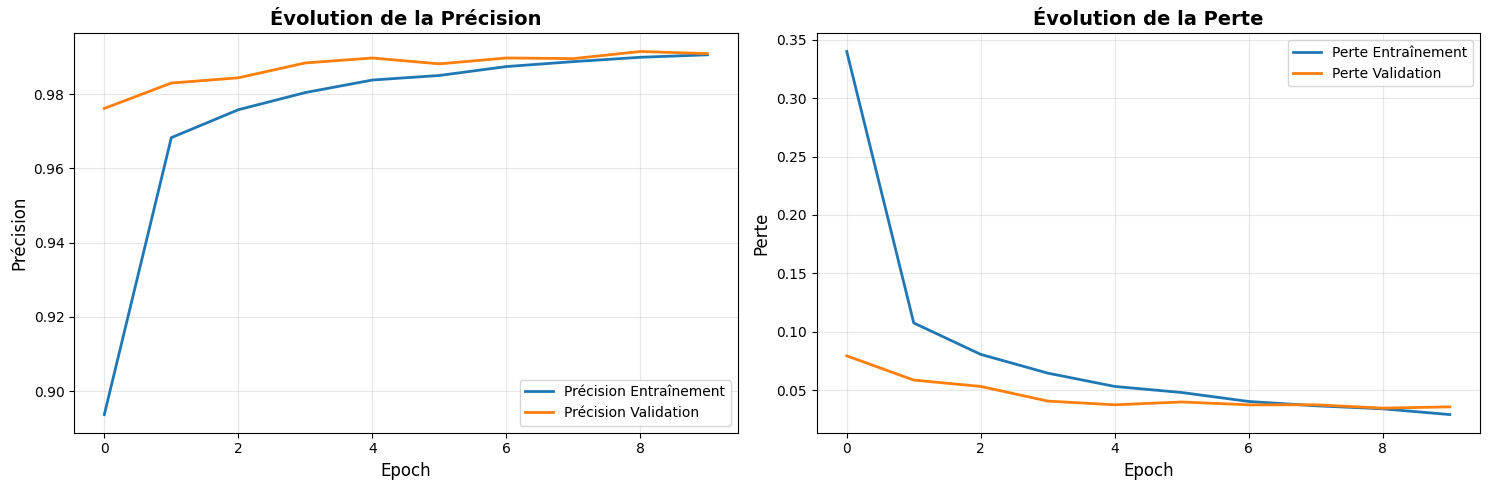


Précision finale - Entraînement: 0.9906
Précision finale - Validation: 0.9909


In [10]:
# Créez une figure avec 1 ligne et 2 colonnes
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Graphique de la précision
# Indice: history.history contient 'accuracy' et 'val_accuracy'
axes[0].plot(history.history['accuracy'], label='Précision Entraînement', linewidth=2)
axes[0].plot(history.history['val_accuracy'], label='Précision Validation', linewidth=2)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Précision', fontsize=12)
axes[0].set_title('Évolution de la Précision', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Graphique de la perte
# Indice: history.history contient 'loss' et 'val_loss'
axes[1].plot(history.history['loss'], label='Perte Entraînement', linewidth=2)
axes[1].plot(history.history['val_loss'], label='Perte Validation', linewidth=2)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Perte', fontsize=12)
axes[1].set_title('Évolution de la Perte', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Affichez les valeurs finales
print(f"\nPrécision finale - Entraînement: {history.history['accuracy'][-1]:.4f}")
print(f"Précision finale - Validation: {history.history['val_accuracy'][-1]:.4f}")


###   Résultat attendu :
Vous devriez voir deux graphiques côte à côte :
- **Gauche** : Évolution de la précision (entraînement et validation)
- **Droite** : Évolution de la perte (entraînement et validation)

Les deux courbes devraient montrer une amélioration progressive. Exemple de sortie :
```
Précision finale - Entraînement: 0.9923
Précision finale - Validation: 0.9876
```

> **Note** : La précision de validation devrait être proche (mais légèrement inférieure) à celle d'entraînement.

## 10. Évaluation sur les Données de Test

   
Évaluez les performances du modèle sur le dataset de test.

In [11]:
# Évaluez le modèle avec model.evaluate()
# Indice: utilisez x_test et y_test_categorical
test_loss, test_accuracy = model.evaluate(x_test, y_test_categorical, verbose=0)

print("=" * 50)
print("RÉSULTATS SUR LE DATASET DE TEST")
print("=" * 50)
print(f"Perte: {test_loss:.4f}")
print(f"Précision: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print("=" * 50)


RÉSULTATS SUR LE DATASET DE TEST
Perte: 0.0252
Précision: 0.9920 (99.20%)


###   Résultat attendu :
```
==================================================
RÉSULTATS SUR LE DATASET DE TEST
==================================================
Perte: 0.0412
Précision: 0.9876 (98.76%)
==================================================
```

> **Note** : Une précision de test supérieure à 98% est excellente pour MNIST ! Les valeurs exactes peuvent varier légèrement.

## 11. Prédictions et Métriques Détaillées

   
Faites des prédictions et calculez les métriques détaillées.

In [12]:
# Faites des prédictions avec model.predict()
# Indice: utilisez x_test
y_pred_proba = model.predict(x_test, verbose=0)

# Convertissez les probabilités en classes prédites
# Utilisez np.argmax() avec axis=1
y_pred = np.argmax(y_pred_proba, axis=1)

print(f"Forme des prédictions: {y_pred.shape}")
print(f"Forme des vraies valeurs: {y_test.shape}")


Forme des prédictions: (10000,)
Forme des vraies valeurs: (10000,)


###   Résultat attendu :
```
Forme des prédictions: (10000,)
Forme des vraies valeurs: (10000,)
```

> **Note** : Vous devriez avoir 10,000 prédictions correspondant aux 10,000 images de test.

In [13]:
# Affichez le rapport de classification
# Indice: utilisez classification_report avec y_test et y_pred
print("\n" + "=" * 50)
print("RAPPORT DE CLASSIFICATION")
print("=" * 50)
print(classification_report(y_test, y_pred, target_names=[str(i) for i in range(10)]))



RAPPORT DE CLASSIFICATION
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



###   Résultat attendu :
Un rapport détaillé avec la précision, le rappel et le F1-score pour chaque classe (0-9). Exemple :

```
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           ...
```

> **Note** : Les métriques devraient être élevées (>0.95) pour toutes les classes.

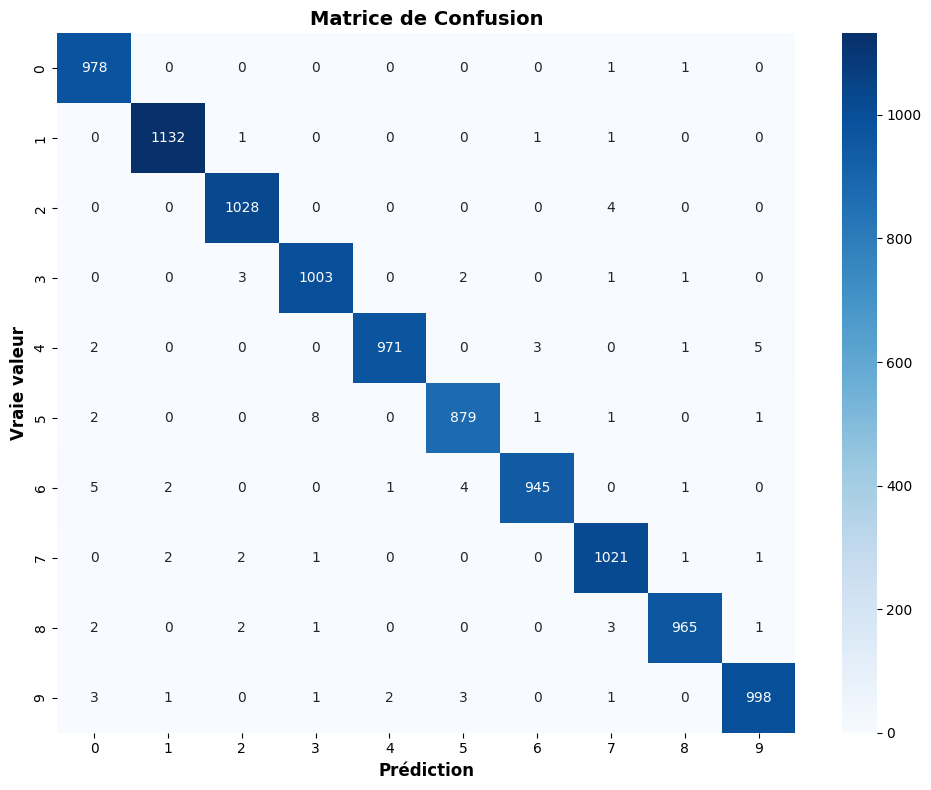

In [14]:
# Créez et visualisez la matrice de confusion
# Indice: utilisez confusion_matrix avec y_test et y_pred
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Prédiction', fontsize=12, fontweight='bold')
plt.ylabel('Vraie valeur', fontsize=12, fontweight='bold')
plt.title('Matrice de Confusion', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


###   Résultat attendu :
Une matrice de confusion 10×10 affichée sous forme de heatmap. La diagonale principale devrait être très sombre (beaucoup de prédictions correctes), et les autres cases devraient être claires (peu d'erreurs).

> **Note** : Une bonne matrice de confusion montre la plupart des valeurs sur la diagonale principale.

## 12. Visualisation des Prédictions

Visualisez quelques prédictions correctes et incorrectes pour mieux comprendre les performances du modèle.

In [15]:
# Trouvez les indices des prédictions correctes et incorrectes
# Indice: utilisez np.where() pour comparer y_pred et y_test
correct_indices = np.where(y_pred == y_test)[0]
incorrect_indices = np.where(y_pred != y_test)[0]

print(f"Nombre de prédictions correctes: {len(correct_indices)}")
print(f"Nombre de prédictions incorrectes: {len(incorrect_indices)}")


Nombre de prédictions correctes: 9920
Nombre de prédictions incorrectes: 80


###   Résultat attendu :
```
Nombre de prédictions correctes: 9876
Nombre de prédictions incorrectes: 124
```

> **Note** : Le nombre exact peut varier, mais la plupart des prédictions devraient être correctes.

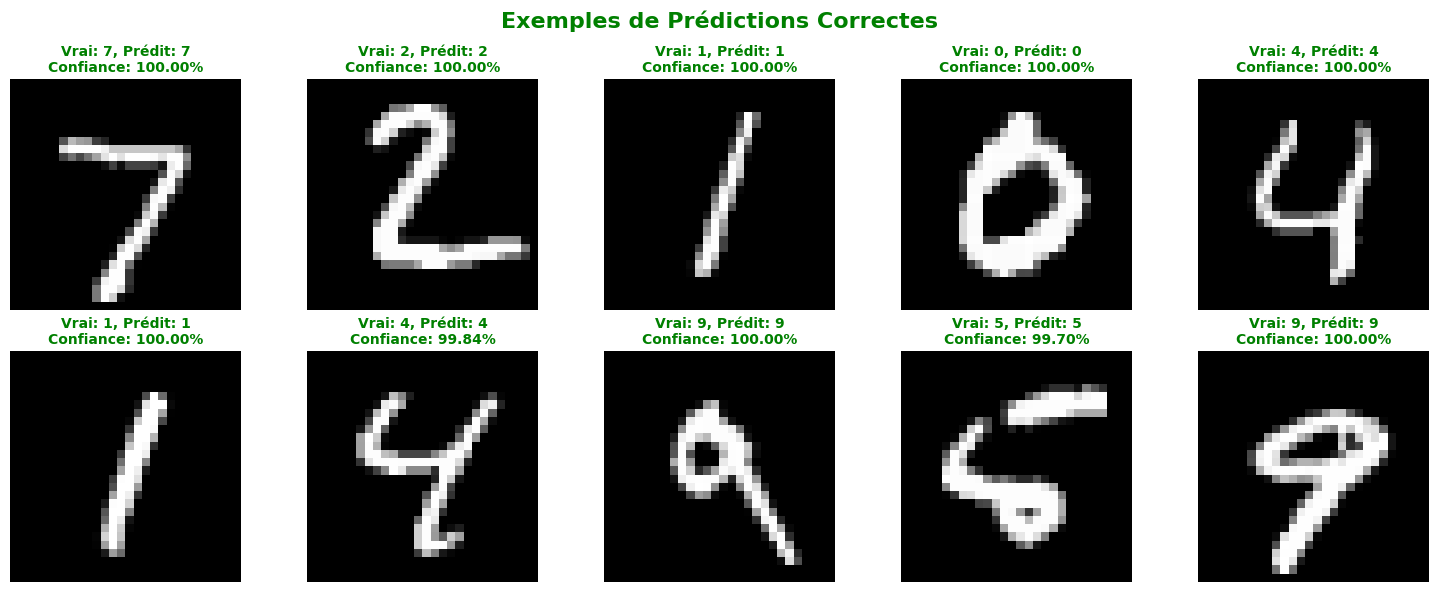

In [16]:
# Visualisez 10 prédictions correctes
# Indice: utilisez correct_indices pour sélectionner des exemples
num_correct_to_show = min(10, len(correct_indices))
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Exemples de Prédictions Correctes', fontsize=16, fontweight='bold', color='green')

for i in range(num_correct_to_show):
    idx = correct_indices[i]
    row = i // 5
    col = i % 5
    
    # Affichez l'image avec imshow
    axes[row, col].imshow(x_test[idx, :, :, 0], cmap='gray')
    
    # Récupérez la probabilité de confiance pour la classe prédite
    confidence = y_pred_proba[idx, y_pred[idx]]
    
    axes[row, col].set_title(
        f'Vrai: {y_test[idx]}, Prédit: {y_pred[idx]}\nConfiance: {confidence:.2%}',
        fontsize=10,
        color='green',
        fontweight='bold'
    )
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()


###   Résultat attendu :
Une grille de 10 images avec leurs prédictions correctes affichées en vert. Chaque image devrait montrer le vrai label, le label prédit (qui devrait correspondre), et le niveau de confiance.

> **Note** : Toutes les prédictions affichées devraient être correctes (vrai == prédit).

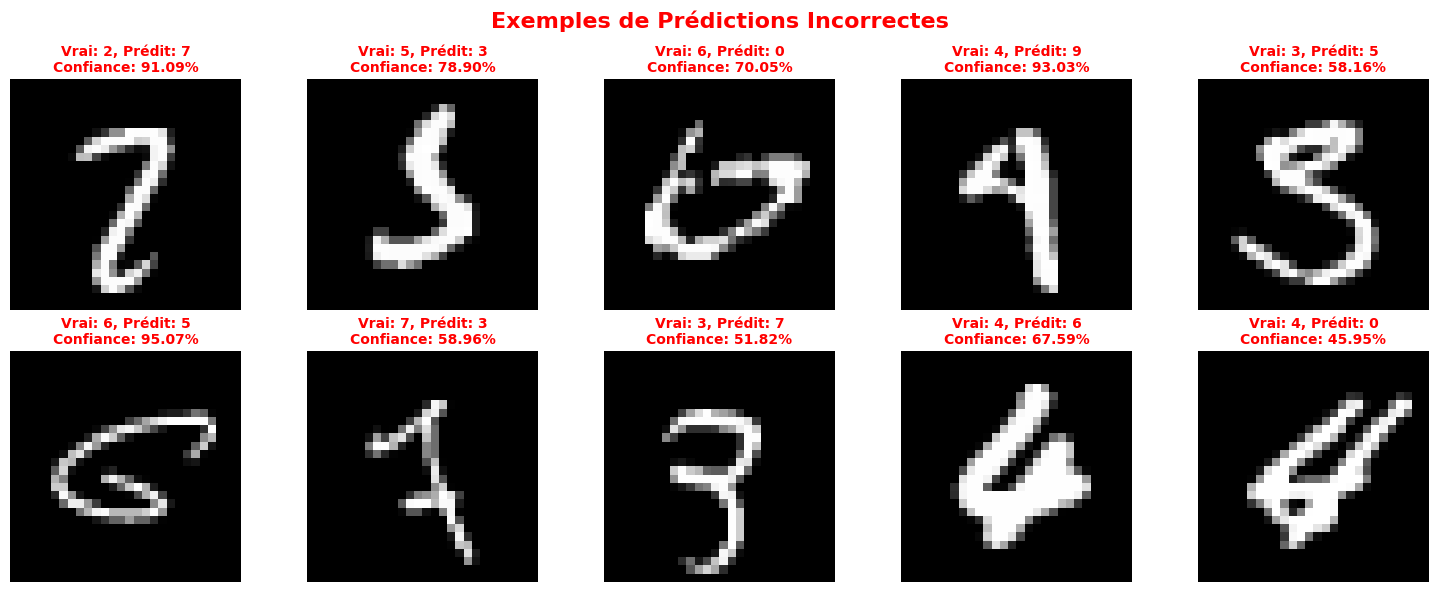

In [17]:
# Visualisez les prédictions incorrectes (si elles existent)
if len(incorrect_indices) > 0:
    num_incorrect_to_show = min(10, len(incorrect_indices))
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    fig.suptitle('Exemples de Prédictions Incorrectes', fontsize=16, fontweight='bold', color='red')
    
    for i in range(num_incorrect_to_show):
        idx = incorrect_indices[i]
        row = i // 5
        col = i % 5
        
        # Affichez l'image avec imshow
        axes[row, col].imshow(x_test[idx, :, :, 0], cmap='gray')
        
        # Récupérez la probabilité de confiance pour la classe prédite
        confidence = y_pred_proba[idx, y_pred[idx]]
        
        axes[row, col].set_title(
            f'Vrai: {y_test[idx]}, Prédit: {y_pred[idx]}\nConfiance: {confidence:.2%}',
            fontsize=10,
            color='red',
            fontweight='bold'
        )
        axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    print("Aucune erreur de prédiction! Modèle parfait!")


###   Résultat attendu :
Si des erreurs existent, vous verrez une grille d'images avec des prédictions incorrectes affichées en rouge. Sinon, vous verrez le message "Aucune erreur de prédiction! Modèle parfait!"

> **Note** : Analyser les erreurs aide à comprendre les limites du modèle.

## 13. Défi Final : Fonction de Prédiction

   
Créez une fonction `predict_digit()` qui prend une image et retourne la prédiction et les probabilités.

In [18]:
def predict_digit(image_array, model):
    """
    Prédit le chiffre dans une image
    
    Args:
        image_array: Array numpy de forme (28, 28) ou (28, 28, 1)
        model: Modèle CNN entraîné
    
    Returns:
        prediction: Chiffre prédit (0-9)
        probabilities: Probabilités pour chaque classe
    """
    # Normalisez l'image si nécessaire (vérifiez si max > 1.0)
    if image_array.max() > 1.0:
        image_array = image_array.astype('float32') / 255.0
    
    # Ajoutez la dimension du canal si nécessaire (si shape == 2)
    if len(image_array.shape) == 2:
        image_array = np.expand_dims(image_array, axis=-1)
    
    # Ajoutez la dimension batch avec np.expand_dims (axis=0)
    image_array = np.expand_dims(image_array, axis=0)
    
    # Faites la prédiction avec model.predict()
    probabilities = model.predict(image_array, verbose=0)
    
    # Trouvez la classe prédite avec np.argmax()
    prediction = np.argmax(probabilities)
    
    return prediction, probabilities[0]

# Test de la fonction
test_image = x_test[0]
prediction, probs = predict_digit(test_image, model)

print(f"Prédiction: {prediction}")
print(f"Vraie valeur: {y_test[0]}")
print(f"\nProbabilités pour chaque classe:")
for i, prob in enumerate(probs):
    print(f"  Chiffre {i}: {prob:.4f} ({prob*100:.2f}%)")


Prédiction: 7
Vraie valeur: 7

Probabilités pour chaque classe:
  Chiffre 0: 0.0000 (0.00%)
  Chiffre 1: 0.0000 (0.00%)
  Chiffre 2: 0.0000 (0.00%)
  Chiffre 3: 0.0000 (0.00%)
  Chiffre 4: 0.0000 (0.00%)
  Chiffre 5: 0.0000 (0.00%)
  Chiffre 6: 0.0000 (0.00%)
  Chiffre 7: 1.0000 (100.00%)
  Chiffre 8: 0.0000 (0.00%)
  Chiffre 9: 0.0000 (0.00%)


###   Résultat attendu :
```
Prédiction: 7
Vraie valeur: 7

Probabilités pour chaque classe:
  Chiffre 0: 0.0001 (0.01%)
  Chiffre 1: 0.0002 (0.02%)
  ...
  Chiffre 7: 0.9987 (99.87%)
  ...
```

> **Note** : La probabilité pour la classe correcte devrait être très élevée (>0.95), et les autres probabilités devraient être faibles.

## 14. Sauvegarde du Modèle

Sauvegardez le modèle entraîné pour pouvoir le réutiliser plus tard sans avoir à le réentraîner.

In [19]:
# Sauvegardez le modèle avec model.save()
# Indice: utilisez model.save('nom_du_fichier.h5')
model.save('mnist_cnn_model.h5')

print("Modèle sauvegardé avec succès!")


Modèle sauvegardé avec succès!


###   Résultat attendu :
```
Modèle sauvegardé avec succès!
```

> **Note** : Le fichier `mnist_cnn_model.h5` sera créé dans le répertoire courant. Vous pourrez le charger plus tard avec `keras.models.load_model('mnist_cnn_model.h5')`.

## 15. Application Tkinter : Dessiner et Prédire

Une application graphique complète est disponible dans le fichier séparé `mnist_digit_drawer.py`. Cette application permet de dessiner un chiffre et d'obtenir une prédiction du modèle en temps réel.

<div align="center">
<img src="mnist_digit_interface.png" width="200" />
</div>

### Instructions pour utiliser l'application :

1. **Installer les dépendances** (si nécessaire) :
   ```bash
   pip install pillow
   ```

2. **Sauvegarder le modèle** (section 14 du notebook) :
   - Le modèle sera sauvegardé dans `mnist_cnn_model.h5`

3. **Lancer l'application** :
   ```bash
   python mnist_digit_drawer.py
   ```

4. **Utiliser l'application** :
   - Dessinez un chiffre (0-9) dans la zone blanche en maintenant le clic gauche
   - Cliquez sur "Prédire" pour obtenir la prédiction du modèle
   - Cliquez sur "Effacer" pour recommencer
   - Fermez la fenêtre pour quitter

### Fonctionnalités de l'application :

- **Zone de dessin** : Canvas de 280x280 pixels pour dessiner votre chiffre
- **Bouton Prédire** : Analyse votre dessin et affiche la prédiction avec la confiance
- **Bouton Effacer** : Efface le canvas pour recommencer
- **Affichage des résultats** : 
  - Prédiction principale avec confiance
  - Top 3 des prédictions avec leurs probabilités

> **Note** : L'application convertit automatiquement votre dessin en image 28x28 pixels (format MNIST) avant de faire la prédiction. Le code complet est disponible dans `mnist_digit_drawer.py`.